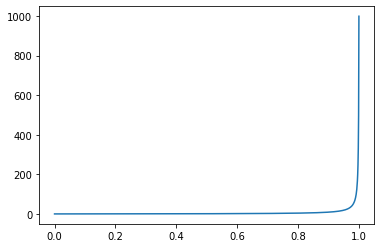

In [5]:
# or(odds ratio)
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def odds_ratio(p):
    return p / (1-p)

x = np.arange(0,1,0.001)
y = odds_ratio(x)
plt.plot(x,y)

/Users/h/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


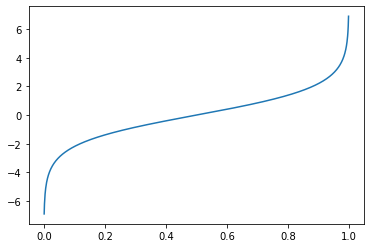

In [6]:
# logit function 

def logit_function(p):
    return np.log(p/(1-p))
x = np.arange(0,1,0.001)
y = logit_function(x)
plt.plot(x,y)

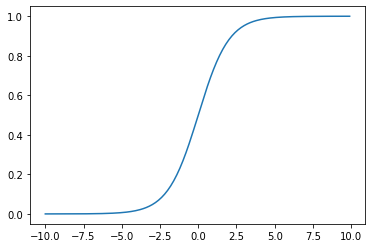

In [9]:
# logistic function

def logistic_function(z):
    return 1 / (1 + np.exp(-z))

x = np.arange(-10,10,0.1)
y = logistic_function(x)
plt.plot(x,y)

/Users/h/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


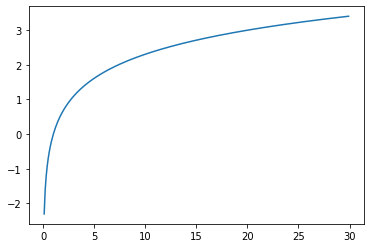

In [11]:
# log graph
x = np.arange(0,30,0.1)
y = np.log(x)
plt.plot(x,y)

In [13]:
# wisconsin breast cancer dataset

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [14]:
print(cancer.data.shape, cancer.target.shape)

(569, 30) (569,)


In [15]:
cancer.data[:3]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

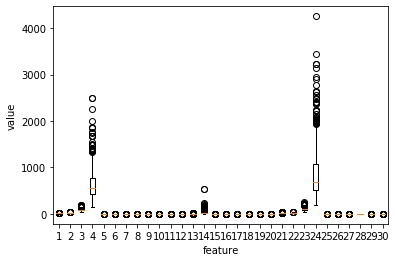

In [16]:
plt.boxplot(cancer.data)
plt.xlabel('feature')
plt.ylabel('value')
plt.show()

In [17]:
cancer.feature_names[[3,13,23]]

array(['mean area', 'area error', 'worst area'], dtype='<U23')

In [18]:
np.unique(cancer.target, return_counts=True)

(array([0, 1]), array([212, 357]))

In [19]:
x = cancer.data
y=cancer.target

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=.2, random_state=42)

In [21]:
print(x_train.shape, x_test.shape)

(455, 30) (114, 30)


In [22]:
np.unique(y_train, return_counts=True)

(array([0, 1]), array([170, 285]))

In [26]:
np.random.seed(42)
class LogisticNeuron:
    def __init__(self):
        self.w = None
        self.b = None
        
    def forward(self, x):
        return np.sum(x * self.w) + self.b
    
    def backward(self, x, err):
        return x*err, err
    
    def fit(self, x, y, epochs=100, learning_rate=.01):
        self.w = np.random.rand(x.shape[1])
        self.b = np.random.rand()
        for i in range(epochs):
            for x_i, y_i in zip(x,y):
                z = self.forward(x_i)
                a = self.activation(z)
                err = -(y_i - a)
                w_grad, b_grad = self.backward(x_i, err)
                self.w -= learning_rate*w_grad
                self.b -= learning_rate*b_grad
                
    def activation(self, z):
        return 1 / (1+np.exp(-z))
    
    def predict(self, x):
        z = [self.forward(x_i) for x_i in x]
        a = self.activation(np.array(z))
        return a > .5

In [27]:
neuron = LogisticNeuron()

In [29]:
neuron.fit(x_train, y_train, epochs=10000)

/Users/h/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: overflow encountered in exp


In [30]:
np.mean(neuron.predict(x_test)==y_test)

/Users/h/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: overflow encountered in exp


0.8859649122807017